# Homework - 2 
## Perceptron on Iris and IrisModified Datasets
### Esra Kantarcı - 20160808023

**Homework details:**

*For the first part of the homework, you are expected to implement a python code for the basic perceptron and test it on the given "iris.csv" file. Train it for several epochs and calculate the accuracy.*

*For the second part of the homework, you need to test your perceptron implementation on "irismodified.csv" Train it for several epochs and check if it can converge or not. If it can not converge, explain why and try to implement a solution with editing your perceptron code.*

## What is Perceptron?

Perceptrons, as known as the very first steps to artificial neural networks, are simple but powerful supervised learning tools. They give binary outputs. Being binary should not be underestimated, it can be very handy if we think that in computer science everything based on either 0 or 1.

Perceptron algorithm was written in 1957 by Frank Rosenblatt.He had modeled a simple version of the neural networks in human body.  

![Perceptron](https://miro.medium.com/max/1000/1*7pwA1DjBw6JDkwZQecUNiw.png)

There are 2 types of perceptrons. It can be either single layer or multilayer. In this homework, single layered one was implemented. The results would be better if we applied multilayered one.

Perceptrons can only learn models from labeled data, which is nature of being supervised learning algorithm. 

Perceptrons gets inputs and some weights as vectors. The weights are the coefficients of the inputs in order to calculate the decision boundries. The weight vector has a w0 weight as bias. In order to get the decision, we need to dot product the weights and the inputs. The input which corresponds to bias is always 1, so we can add the bias into the equation no matter what. 

![Perceptron algorithm](http://harveycohen.net/image/Perceptron-diagram.jpg)
The perceptron will take the dot product of the weight and the corresponding inputs, sums them. In our code, it is called "calculated_input", but it is generally named as net input in the terminology. After net input is calculated, the perceptron checks the outputs. Since it is supervised learning, it returns the errors. The perceptron tries to converge it to 0 in each iteration with regard of some step, which is called learning rate. Learning rate keeps us in pace with the training and tries to find the minimum point of the error function.

There are several activation functions for the prediction. Unit step function, sign function, sigmoid function, etc. In our code, unit step function was used for the simplicity. But we could use sigmoid function as well, which gives the logistic output between 0 and 1. 

Now, let's check the code.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import random
import os
from matplotlib.colors import ListedColormap

## Perceptron implementation

The code itself was taken from various GitHub repositories by small parts, which will be mentioned in the bibliography. However, since the perceptrons are very specific algorithms, the codes are very similar. 

We have a constructor, which has default learning rate of 0.01 and number of iterations of 10.

Then we create a fit function, which applies Stochastic Gradient Descent algorithm with update on each iteration. At the first, weights are all zeros. We had added 1 to input's column numbers, because there is a bias part. Then, we had applied the update based sum on weights due to difference between the actual and predicted output for each input and check the errors. (I found a cool code segment for checking the number of errors in each iteration, and applied there. It is handy, I could add some graph with this errors_ array as well.)

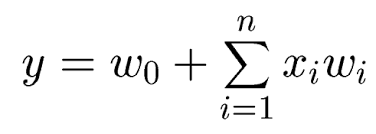
We have calculated_input function, which is as I mentioned before, actually net input function to get dot product of weight vector and input vector. What it does is simply shown in the formula above. 

Then we have predict function, which does binary classification with the calculated net inputs. Let's not forget, we could have add a seperate activation function to this code, but this part already includes one simple unit-step-activation function to handle, so we did not define another function.

The predict function is used repeatedly at the fit function in each iteration to converge the output within the target. 

In [96]:
class Perceptron:
    def __init__(self, learning_rate=0.01, iterations=10):
        self.learning_rate = learning_rate
        self.iterations = iterations

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        for _ in range(self.iterations):
            errors = 0
            #using zip function for the parallel iterations
            zip_x_y = zip(X, y)
            for xi, target in zip_x_y:
                update = self.learning_rate * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def calculated_input(self, X):
        #Dot product of w and x and adding the bias
        calculated_input = np.dot(X, self.w_[1:]) + self.w_[0]
        return calculated_input
    
    def predict(self, X):
        #the .where(self.calculated_input(X) >= 0.0, 1, -1) is actually an unit-step-activitation function
        #and returns with the outcome as the prediction.
        return np.where(self.calculated_input(X) >= 0.0, 1, -1)

## Dataset Preperations

So, before applying our perceptron model to our data, we need to adjust the dataset. We need X array as input and y array as output for our training. We could also add some test part, this is why I had shuffled the values, however since it was not mandatory on our assignment, I had not split the training set and test set for validation.

We have 2 datasets: Iris.csv and IrisModified.csv
At the first step, we need to use Iris and check if it converges within this perceptron algorithm. Then we need to apply the algorithm onto IrisModified dataset and check the convergence status. 

Each datasets consists of the same amount of rows (100) and they have the same general properties.


In [245]:
df = pd.read_csv('iris.csv', header=None)
df.describe()

,0,1,2,3
count,99.000000,99.000000,99.000000,99.000000
mean,5.468687,3.096970,2.849495,0.779798
std,0.644545,0.477548,1.450501,0.566763
min,4.300000,2.000000,1.000000,0.100000
25%,5.000000,2.800000,1.500000,0.200000
50%,5.400000,3.100000,1.900000,0.600000
75%,5.900000,3.400000,4.350000,1.300000
max,7.000000,4.400000,5.100000,1.800000


In [246]:
df2 = pd.read_csv('irismodified.csv', header=None)
df2.describe()

,0,1,2,3
count,99.000000,99.000000,99.000000,99.000000
mean,5.468687,3.096970,2.849495,0.779798
std,0.644545,0.477548,1.450501,0.566763
min,4.300000,2.000000,1.000000,0.100000
25%,5.000000,2.800000,1.500000,0.200000
50%,5.400000,3.100000,1.900000,0.600000
75%,5.900000,3.400000,4.350000,1.300000
max,7.000000,4.400000,5.100000,1.800000


### On the datasets:
As you can see; values of mean, standart deviation, minimum of the columns and maximum of the columns are same. So, the general properties are not changed much. However, outputs are different which will cause us problem later on. 

So, in the code below, I had imported the Iris dataset as DataFrame df and shuffled it in anycase for the future use. Then allocated the first 4 columns as input vector X and the fifth column as output label y. Then encoded the labels as 1 and -1. If it is "Iris-setosa", the value in the rows will turn to -1. 

In [97]:
os.chdir("C:\\Users\\esrac\\Downloads")
df = pd.read_csv('iris.csv', header=None)
df_shuffled = df.sample(frac=1)
print(df_shuffled)
y = df_shuffled.iloc[0:,4].values
y = np.where(y == "Iris-setosa", -1 ,1)
X = df_shuffled.iloc[0:, 0:4].values

      0    1    2    3                4
2   4.7  3.2  1.3  0.2      Iris-setosa
78  6.0  2.9  4.5  1.5  Iris-versicolor
50  7.0  3.2  4.7  1.4  Iris-versicolor
45  4.8  3.0  1.4  0.3      Iris-setosa
52  6.9  3.1  4.9  1.5  Iris-versicolor
..  ...  ...  ...  ...              ...
48  5.3  3.7  1.5  0.2      Iris-setosa
25  5.0  3.0  1.6  0.2      Iris-setosa
68  6.2  2.2  4.5  1.5  Iris-versicolor
88  5.6  3.0  4.1  1.3  Iris-versicolor
74  6.4  2.9  4.3  1.3  Iris-versicolor

[99 rows x 5 columns]


## Result after Training: 
After creating the perceptron with learning rate as 0.1 and number of iterations as 1000, I called fit function with inputs X and target outputs y. Then checked the errors. As you can see, it immediately converged.

In [98]:
ppn=Perceptron(learning_rate=0.1,iterations=1000)
ppn.fit(X,y)
print(ppn.errors_)

[7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

## Graphically shown error list and suitable weights

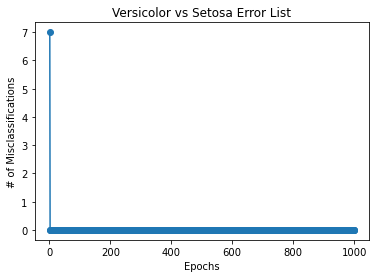

[-0.2  -0.3  -0.86  1.36  0.64]


In [99]:
plt.plot(range(1,len(ppn.errors_) + 1),ppn.errors_, marker='o')
#plt.xlabel = 'Epochs'
#plt.ylabel = '# of Misclassifications'
plt.xlabel('Epochs')
plt.ylabel('# of Misclassifications')
plt.title('Versicolor vs Setosa Error List')
plt.show()

print(ppn.w_)

## IrisModified DataSet

We had prepared the dataset as we had done in the iris dataset, now we had given names X2 to input vector and y2 to label vector.

In [105]:
df2 = pd.read_csv('irismodified.csv', header=None)
df2_shuffled = df2.sample(frac=1)
print(df2_shuffled)
y2 = df2_shuffled.iloc[:,4].values
y2 = np.where(y2 == "Iris-setosa", -1 ,1)
X2 = df2_shuffled.iloc[:, 0:4].values
print(X2)

      0    1    2    3                4
78  6.0  2.9  4.5  1.5  Iris-versicolor
94  5.6  2.7  4.2  1.3  Iris-versicolor
5   5.4  3.9  1.7  0.4      Iris-setosa
66  5.6  3.0  4.5  1.5  Iris-versicolor
59  5.2  2.7  3.9  1.4  Iris-versicolor
..  ...  ...  ...  ...              ...
36  5.5  3.5  1.3  0.2      Iris-setosa
12  4.8  3.0  1.4  0.1      Iris-setosa
42  4.4  3.2  1.3  0.2      Iris-setosa
64  5.6  2.9  3.6  1.3  Iris-versicolor
57  4.9  2.4  3.3  1.0  Iris-versicolor

[99 rows x 5 columns]
[[6.  2.9 4.5 1.5]
 [5.6 2.7 4.2 1.3]
 [5.4 3.9 1.7 0.4]
 [5.6 3.  4.5 1.5]
 [5.2 2.7 3.9 1.4]
 [6.7 3.1 4.7 1.5]
 [4.4 2.9 1.4 0.2]
 [4.8 3.1 1.6 0.2]
 [6.3 2.3 4.4 1.3]
 [5.7 2.8 4.5 1.3]
 [4.8 3.  1.4 0.3]
 [7.  3.2 4.7 1.4]
 [6.1 2.8 4.  1.3]
 [4.5 2.3 1.3 0.3]
 [5.5 2.4 3.8 1.1]
 [5.1 3.3 1.7 0.5]
 [4.9 3.1 1.5 0.1]
 [6.9 3.1 4.9 1.5]
 [5.4 3.4 1.5 0.4]
 [5.1 3.8 1.6 0.2]
 [5.1 3.7 1.5 0.4]
 [5.7 2.9 4.2 1.3]
 [4.4 3.  1.3 0.2]
 [5.8 2.7 4.1 1. ]
 [6.4 3.2 4.5 1.5]
 [6.7 3.  5.  1.7]
 [4

## Results of Perceptron on IrisModified Dataset

So,as you can see from the below, it did not converge on iteration of 1000. Let's check out why from data visualization tools.

In [101]:
ppn2=Perceptron(learning_rate=0.1,iterations=1000)
ppn2.fit(X2,y2)
print(ppn2.errors_)

[33, 21, 22, 24, 21, 22, 24, 21, 22, 21, 24, 21, 24, 21, 24, 19, 21, 20, 21, 24, 19, 22, 21, 22, 23, 18, 21, 22, 21, 22, 21, 20, 21, 20, 22, 19, 21, 22, 21, 22, 21, 22, 24, 22, 17, 19, 24, 21, 18, 24, 22, 19, 21, 22, 24, 20, 22, 16, 22, 22, 21, 22, 20, 19, 22, 22, 21, 20, 22, 19, 24, 19, 22, 24, 18, 21, 22, 20, 22, 21, 22, 20, 21, 22, 20, 19, 22, 24, 18, 21, 22, 21, 20, 24, 19, 18, 21, 22, 22, 21, 22, 22, 21, 22, 21, 20, 19, 22, 22, 21, 20, 24, 18, 19, 24, 19, 18, 25, 17, 20, 20, 23, 20, 20, 23, 18, 22, 19, 18, 24, 19, 18, 19, 22, 24, 22, 19, 18, 21, 22, 22, 21, 22, 23, 20, 24, 18, 21, 22, 22, 21, 22, 24, 19, 20, 24, 18, 21, 22, 22, 21, 20, 24, 19, 20, 24, 19, 20, 22, 22, 21, 22, 22, 19, 21, 20, 22, 22, 19, 22, 22, 19, 22, 22, 22, 19, 22, 22, 23, 18, 19, 20, 18, 21, 22, 22, 21, 22, 22, 19, 20, 21, 20, 22, 22, 19, 22, 22, 22, 19, 22, 22, 22, 21, 23, 19, 21, 24, 17, 20, 22, 19, 20, 21, 23, 19, 21, 20, 22, 22, 19, 21, 24, 18, 22, 22, 19, 21, 20, 22, 22, 22, 22, 22, 19, 24, 18, 19, 20, 22,

## Column-wise visualization
As you can see below, even though the general properties are still the same, the data spread was changed. Blue dotted graphs belong to Iris dataset, where the red ones are from IrisModified dataset. It seems the Iris-setosa and Iris-versicolor difference was less obvious from the dataset. 

Blue dots belong to iris dataset where reds are from irismodified dataset


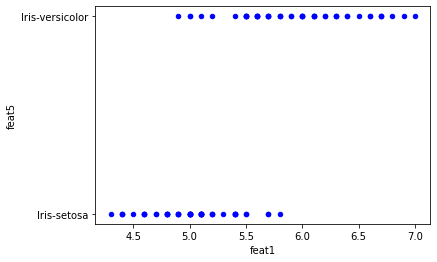

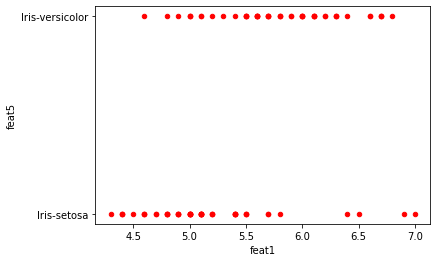

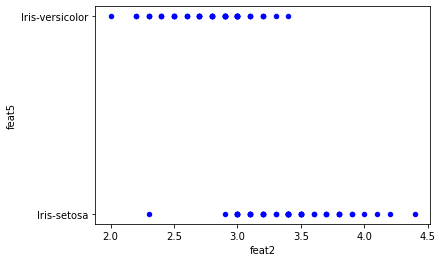

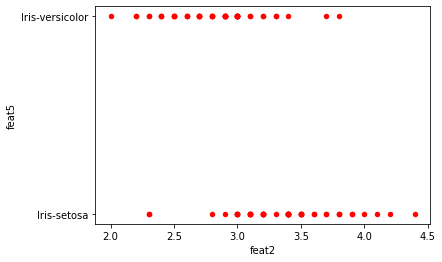

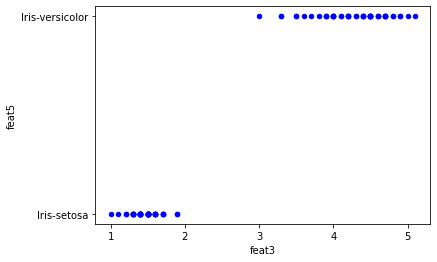

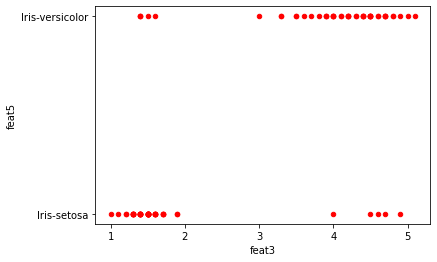

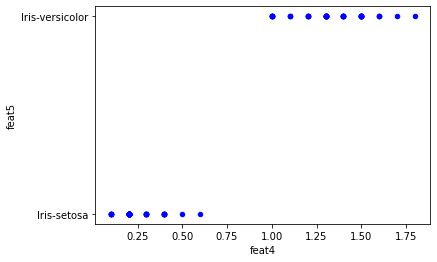

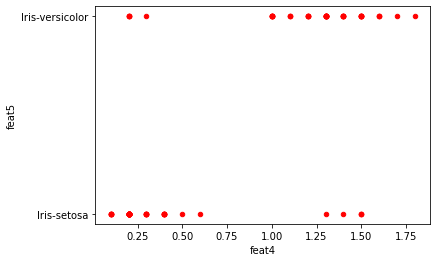

In [102]:
#Let's check what is changed in original dataset
#first 50 record is Setosa, others are Versicolor. 
df3 = pd.read_csv('iris.csv', header=None)
df4= pd.read_csv('irismodified.csv', header=None)

print("Blue dots belong to iris dataset where reds are from irismodified dataset")

df3.columns=['feat1', 'feat2', 'feat3', 'feat4','feat5']
df4.columns=['feat1', 'feat2', 'feat3', 'feat4','feat5']

df3.plot(x ='feat1', y='feat5', kind = 'scatter', color = "blue")
plt.show()
df4.plot(x ='feat1', y='feat5', kind = 'scatter' , color = "red")
plt.show()

df3.plot(x ='feat2', y='feat5', kind = 'scatter' , color = "blue")
plt.show()
df4.plot(x ='feat2', y='feat5', kind = 'scatter', color = "red")
plt.show()

df3.plot(x ='feat3', y='feat5', kind = 'scatter' , color = "blue")
plt.show()
df4.plot(x ='feat3', y='feat5', kind = 'scatter', color = "red")
plt.show()


df3.plot(x ='feat4', y='feat5', kind = 'scatter' , color = "blue")
plt.show()
df4.plot(x ='feat4', y='feat5', kind = 'scatter', color = "red")
plt.show()

## Data-wise visualization

From the figures below, you can see at the first graph (which belongs to Iris dataset) is linearly sepearable. But, you can see there are outliers in the second graph, which belongs to IrisModified dataset obviously.

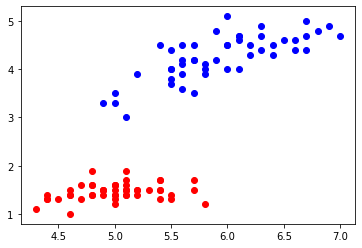

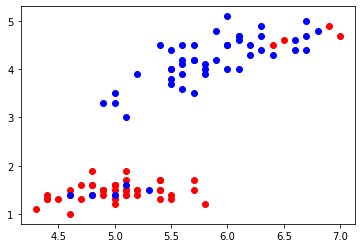

In [81]:
y = df3
x = y.iloc[0:100, [0, 2]].values
plt.scatter(x[:50, 0], x[:50, 1], color='red')
plt.scatter(x[50:100, 0], x[50:100, 1], color='blue')
plt.scatter(x[100:150, 0], x[100:150, 1], color='yellow')
plt.show()
y = y.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

y = df4
x = y.iloc[0:100, [0, 2]].values
plt.scatter(x[:50, 0], x[:50, 1], color='red')
plt.scatter(x[50:100, 0], x[50:100, 1], color='blue')
plt.scatter(x[100:150, 0], x[100:150, 1], color='yellow')
plt.show()
y = y.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
#

## Why did not the IrisModified converge?

Perceptrons are very powerful, but a single perceptron with no hidden layer has some restrictions. Single layer perceptrons can only learn linearly seperable patterns. So, solutions?

### 1- Do not use perceptron algorithm.
We cannot do it, the task is converge it with a single perceptron. SVM would be OK for example.

### 2- Use Multiple Perceptron algorithm.
We cannot use it, the task is to converge with a single perceptron. No hidden layers can be added.

### 3- Let there some misclassifications.
This is an easy and intiutive way for the solution. There are outliers, and the algorithm has some limitations. So we need to give up on some accuracy and accept the weights from the minimum errors given.

I had called this perceptron as sloppy perceptron because it lacks accuracy, a bit unpleasant and loose. However, it tries its best and tries to minimize the error. So, we should not blame the algorithm for the results. 

The algorithm itself is the same with our main Perceptron. However, I had added some modifications. Now there is a_ for minimum of the errors in the sequence. (I named it a_ due to "accuracy" reasons. But we can easily rename it as minimum.)

A better algorithm would not run the training second time, but there were no restrictions on the assignment for the complexity. And the name is SloppyPerceptron, this is why, I did not make a faster approach. 

So, in this fit function, after taking the minimum numbers of the error in the iteration cycle, we re-run the training until we reach the minimum errored weights and return it. 

I also added best_result function for the predictions with the minimum errored weights (bestw_). Simple and useful. 

In [296]:
#Okay, so we have some outliers now. So, we need to set some threshold or let some misclassifications. 

class SloppyPerceptron:
    def __init__(self, learning_rate=0.01, iterations=10):
        self.learning_rate = learning_rate
        self.iterations = iterations

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        self.a_ = 0
        self.bestw_ = np.zeros (1+X.shape[0])
        
        for _ in range(self.iterations):
            errors = 0
            #using zip function for the parallel iterations
            zip_x_y = zip(X, y)
            for xi, target in zip_x_y:
                update = self.learning_rate * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        self.a_=min(self.errors_)
        print("Minimum misclassifications: ", self.a_)
        
        for _ in range (self.iterations):
            errors = 0 
            zip_x_y=zip(X,y)
            for xi, target in zip_x_y:
                if errors != self.a_:
                    update = self.learning_rate * (target - self.predict(xi))
                    self.w_[1:] += update*xi
                    self.w_[0] += update
                    errors += int(update !=0.0)
                else:
                    self.bestw_=self.w_
        self.errors_.append(errors)
        return self
    
    def calculated_input(self, X):
        calculated_input = np.dot(X, self.w_[1:]) + self.w_[0]
        return calculated_input
    
    def predict(self, X):
        #the .where(self.calculated_input(X) >= 0.0, 1, -1) part is actually an activitation function
        return np.where(self.calculated_input(X) >= 0.0, 1, -1)
    
    def best_result(self, X, weights):
        net_input = np.dot(X, self.bestw_[1:]) + self.bestw_[0]
        return np.where(net_input >= 0.0, 1, -1)
    

In [304]:
#Adding this here again for the easiness, but it is actually redundant

df2 = pd.read_csv('irismodified.csv', header=None)
df2_shuffled = df2.sample(frac=1)
print(df2_shuffled)
y2 = df2_shuffled.iloc[:,4].values
y2 = np.where(y2 == "Iris-setosa", -1 ,1)
X2 = df2_shuffled.iloc[:, 0:4].values
print(X2)

      0    1    2    3                4
24  4.8  3.4  1.9  0.2      Iris-setosa
64  5.6  2.9  3.6  1.3  Iris-versicolor
45  7.0  3.2  4.7  1.4      Iris-setosa
62  6.0  2.2  4.0  1.0  Iris-versicolor
71  6.1  2.8  4.0  1.3  Iris-versicolor
..  ...  ...  ...  ...              ...
87  6.3  2.3  4.4  1.3  Iris-versicolor
20  5.4  3.4  1.7  0.2      Iris-setosa
25  5.0  3.0  1.6  0.2      Iris-setosa
70  5.9  3.2  4.8  1.8  Iris-versicolor
96  5.7  2.9  4.2  1.3  Iris-versicolor

[99 rows x 5 columns]
[[4.8 3.4 1.9 0.2]
 [5.6 2.9 3.6 1.3]
 [7.  3.2 4.7 1.4]
 [6.  2.2 4.  1. ]
 [6.1 2.8 4.  1.3]
 [6.8 2.8 4.8 1.4]
 [5.1 3.4 1.5 0.2]
 [5.7 3.  4.2 1.2]
 [6.3 3.3 4.7 1.6]
 [5.5 2.3 4.  1.3]
 [5.2 3.4 1.4 0.2]
 [5.  3.4 1.6 0.4]
 [4.7 3.2 1.6 0.2]
 [5.  3.2 1.2 0.2]
 [6.4 2.9 4.3 1.3]
 [5.  3.3 1.4 0.2]
 [6.  2.7 5.1 1.6]
 [5.1 3.5 1.4 0.2]
 [5.8 2.7 3.9 1.2]
 [5.2 4.1 1.5 0.1]
 [6.4 3.2 4.5 1.5]
 [4.7 3.2 1.3 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [5.4 3.  4.5 1.5]
 [5.1 3.7 1.5 0.4]
 [5

## Results of SloppyPerceptron on IrisModified Dataset

So, the misclassifications might change between 10 to 20 on this algorithm. It changes due to shuffled version of the dataset, learning rate and number of the iterations. A cross validation segment would also help on this task. Accuracy is 90% to 80% within the algorithm and the set.

On this version we had 13 misclassifications in total which ends up with 87% accuracy. You can see the favorable weights as [  5.2   -3.46  -1.96  10.2  -11.5 ] And different weights might also give the same misclassificated outputs, too. 

So, there were some trade-offs we had accepted on this case. We could minimize it with other tools of modelling. But, this was a way to do the predictions. Below you can see the misclassifications list and I will add it to our pdf as well. 

## In conclusion

Single perceptrons are useful for linearly seperable datasets, but for non-linearly sepearable datasets, we need different tools or approaches for the better results. For a solution to our task, the average working perceptrons with some misclassifications were used. The weight vector from the minimum-error-given-sequence is accepted and chosen for the prediction. The code can be improved further for the complexity issues and the solutions can be enhanced to better with train-test data and some cross validation approaches, as well. 

In [305]:
ppn3=SloppyPerceptron(learning_rate=0.1,iterations=1000)
ppn3.fit(X2,y2)
print(ppn3.errors_)
calc_weights=ppn3.bestw_
print("Best weights are: ", calc_weights)
results = ppn3.best_result(X2, ppn3.bestw_)
results = np.where(results == -1, "Iris-setosa" ,"Iris-versicolor")
y2 = np.where(y2 == -1, "Iris-setosa" ,"Iris-versicolor")
print(y2)
print("Results: ", results)
accuracy = 1-( ppn3.a_ / (1+X2.shape[0]))
print("Accuracy is: ", accuracy)

Minimum misclassifications:  13
[21, 18, 18, 18, 16, 17, 20, 16, 16, 16, 18, 16, 18, 16, 16, 16, 16, 16, 18, 16, 16, 16, 16, 16, 18, 16, 15, 16, 16, 16, 16, 16, 17, 16, 16, 18, 16, 15, 20, 16, 16, 16, 16, 17, 16, 16, 16, 16, 16, 18, 16, 16, 16, 16, 16, 18, 16, 16, 16, 17, 16, 16, 16, 18, 16, 16, 17, 16, 16, 16, 18, 16, 16, 18, 16, 16, 16, 18, 16, 16, 18, 17, 20, 16, 16, 16, 18, 16, 18, 16, 16, 18, 17, 20, 16, 16, 16, 18, 16, 18, 16, 16, 18, 17, 20, 16, 16, 16, 16, 17, 18, 18, 18, 20, 18, 20, 16, 16, 16, 16, 18, 16, 16, 16, 16, 16, 18, 17, 23, 17, 16, 16, 16, 16, 18, 16, 16, 16, 16, 18, 16, 16, 16, 18, 16, 16, 16, 18, 16, 16, 16, 18, 16, 16, 16, 16, 16, 18, 16, 18, 16, 16, 16, 18, 16, 16, 16, 16, 16, 18, 16, 18, 16, 16, 16, 18, 16, 16, 16, 16, 16, 19, 16, 16, 16, 18, 18, 13, 20, 22, 18, 18, 20, 18, 16, 16, 16, 16, 16, 18, 16, 16, 18, 17, 22, 18, 22, 16, 18, 19, 20, 19, 18, 18, 20, 16, 16, 16, 16, 16, 18, 19, 18, 19, 20, 16, 20, 16, 20, 20, 16, 20, 16, 20, 20, 16, 20, 16, 20, 16, 20, 16,

In [306]:
results = np.where(results == "Iris-setosa", -1 ,1)
y2 = np.where(y2 =="Iris-setosa", -1 ,1)

In [307]:
dataset = pd.DataFrame({'Predicted': results, 'Actual': y2})
   
  
dataset['Score_diff'] = dataset['Predicted'].sub(dataset['Actual'], axis = 0) 
print("\nDifference of predicted and actual outputs :\n", dataset) 


Difference of predicted and actual outputs :
     Predicted  Actual  Score_diff
0          -1      -1           0
1           1       1           0
2           1      -1           2
3           1       1           0
4           1       1           0
..        ...     ...         ...
94          1       1           0
95         -1      -1           0
96         -1      -1           0
97          1       1           0
98          1       1           0

[99 rows x 3 columns]


In [308]:
dataset["Predicted"] = np.where(dataset["Predicted"] == -1, "Iris-setosa" ,"Iris-versicolor")
dataset["Actual"]  = np.where(dataset["Actual"] == -1 , "Iris-setosa", "Iris-versicolor")
dataset["Score_diff"] = np.where(dataset["Score_diff"] == 0 , "Correct" , "Wrong")
dataset.head(n=10)

,Predicted,Actual,Score_diff
0,Iris-setosa,Iris-setosa,Correct
1,Iris-versicolor,Iris-versicolor,Correct
2,Iris-versicolor,Iris-setosa,Wrong
3,Iris-versicolor,Iris-versicolor,Correct
4,Iris-versicolor,Iris-versicolor,Correct
5,Iris-versicolor,Iris-versicolor,Correct
6,Iris-setosa,Iris-setosa,Correct
7,Iris-versicolor,Iris-versicolor,Correct
8,Iris-versicolor,Iris-versicolor,Correct
9,Iris-versicolor,Iris-setosa,Wrong


In [309]:
dataset.to_csv(r'DataComparision.csv')

# Bibliography 

- TowardsDataScience - Arunava - the Perceptron: 
https://towardsdatascience.com/the-perceptron-3af34c84838c

- Dr. Harven A Cohen - The Perceptron: http://harveycohen.net/image/perceptron.html

- Simplilearn - What is Perceptron: A Beginners Tutorial for Perceptron: https://www.simplilearn.com/what-is-perceptron-tutorial#:~:text=A%20Perceptron%20is%20an%20algorithm,learn%20only%20linearly%20separable%20patterns.

- GitHub - Lithathampan - Perceptron: https://github.com/lithathampan/perceptron

- GitHub - Honghe - Perceptron: https://github.com/Honghe/perceptron

- GitHub - AnnFernandes - IrisDataset Perceptron: https://github.com/AnnFernandes/IrisDataset_Perceptron

- GitHub - TungeTyt - Perceptron Iris: https://github.com/Tungetyt/perceptronIris

- GitHub - JakeCowton - SingleLayer Perceptron: https://github.com/JakeCowton/SingleLayerPerceptron

- Mllog - Implementing a perceptron learning algorithm in Python: https://mllog.github.io/2016/11/04/Python-ML-Chapter-2/

- Medium - Elif Işıkhan - Perceptron Nedir?: https://medium.com/@isikhanelif/perceptron-nedir-83dd39aadfa0

- Python Machine Learning - Perceptrons: The First Neural Networks: https://pythonmachinelearning.pro/perceptrons-the-first-neural-networks/

- Akshay L Chandra - Perceptron Learning Algorithm: A Graphical Explanation Of Why It Works: https://towardsdatascience.com/perceptron-learning-algorithm-d5db0deab975

- Simone Alberto Peirone - Iris classification with Perceptron from scratch: https://simonepeirone.it/posts/ml-01-perceptron/

